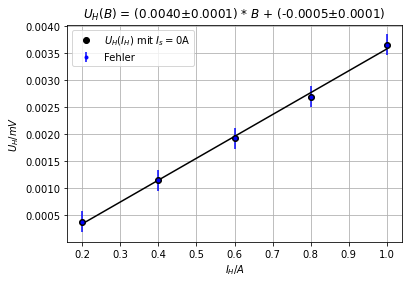

In [5]:
#Braucht man halt, ne?
from scipy import stats
import math
import numpy as np
from matplotlib import pyplot as plt
from lmfit import report_fit
from lmfit.models import LinearModel

def split(value):
    exp=int(math.log10(value))
    man=value/10**exp
    return exp, man
#Reg's machen
def fit(x,y,err):
    weights=1/err
    model = LinearModel(independent_vars=['x'])
    result=model.fit(data=y,x=x,weights=weights)
    v=[] #values
    s=[] #stderr
    #0:slope 1
    for name, param in result.params.items():
        v.append(param.value)
        if(param.stderr==None):
            s.append(0)
        else:
            s.append(param.stderr)
    return v,s

#zeichnet die gegebenen Messwerte inkl reg's, wird gespeichert falls save=True
def zeichnen (x, y, label, err, speichername, xlabel, ylabel, titel=" ", save=True):
    #Alles für die 1. Werte
    plt.plot(x, y, "ok", label=label)
    plt.errorbar(x, y, yerr=err, color="b", fmt='.', label="Fehler")
    reg = fit(x,y,err)
    plt.plot(x, (reg[0][0]*x+reg[0][1]), color="k")
    #Rest des Plots, also z.B. Achsen usw. 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(("$U_H(B)$ = ({:.4f}$\pm${:.4f}) * $B$ + ({:.4f}$\pm${:.4f})".format(reg[0][0],reg[1][0],reg[0][1],reg[1][1])))
    plt.grid()
    plt.legend()
    if bool(save) == True:
        plt.savefig(speichername)
    plt.show()
    return (reg)

x=np.array([1,0.8,0.6,0.4,0.2])

y=np.array([0.0036537,
0.0026922,
0.001923,
0.0011538,
0.0003846])
err=np.full(5,0.0001923)
reg = zeichnen (x=x, y=y, label="$U_H(I_H)$ mit $I_s=0$A", err=err, speichername="3e0", xlabel="$I_H/A$", ylabel="$U_H/mV$", titel=" ", save=True)

